In [1]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as pl

result = pd.read_csv("result.csv")

In [43]:
import matplotlib as mpl

rgbs = np.array([
    [128, 130, 132],
    [255, 241, 0],
    [250, 169, 25],
    [112, 75, 42],
    [14, 145, 207],
    [13, 150, 71],
    [190, 215, 83],
    [85, 147, 141],
    [131, 112, 178],
    [247, 187, 213],
    [234, 27, 27],
    [195, 154, 107],
    [0, 46, 167]
]) / 255


cmap = mpl.colors.ListedColormap(rgbs)
boundaries = list(range(1, 14))
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)

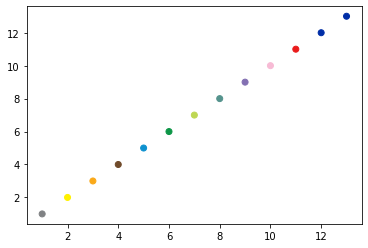

In [44]:
x = np.arange(1, 14)
pl.scatter(x, x, cmap=cmap, c=x, norm=norm)

In [17]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [46]:
(result['result_discrete']+1).value_counts()

4     16244
5     10804
13     3059
12     2757
7      2754
2       900
9       472
6       462
3       245
1       155
8        81
11       68
10       48
Name: result_discrete, dtype: int64

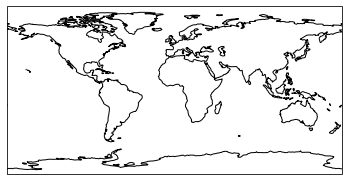

In [5]:
# from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

In [72]:
lithology_mapping = {
    1: "Gravel and coarser",
    2: "Sand",
    3: "Silt",
    4: "Clay",
    5: "Calcareous ooze",
    6: "Radiolarian ooze",
    7: "Diatom ooze",
    8: "Sponge spicules",
    9: "Mixed calcareous/siliceous ooze",
    10: "Shells and coral fragments",
    11: "Ash and volcanic sand/gravel",
    12: "Siliceous mud",
    13: "Fine-grained calcareous sediment"
}

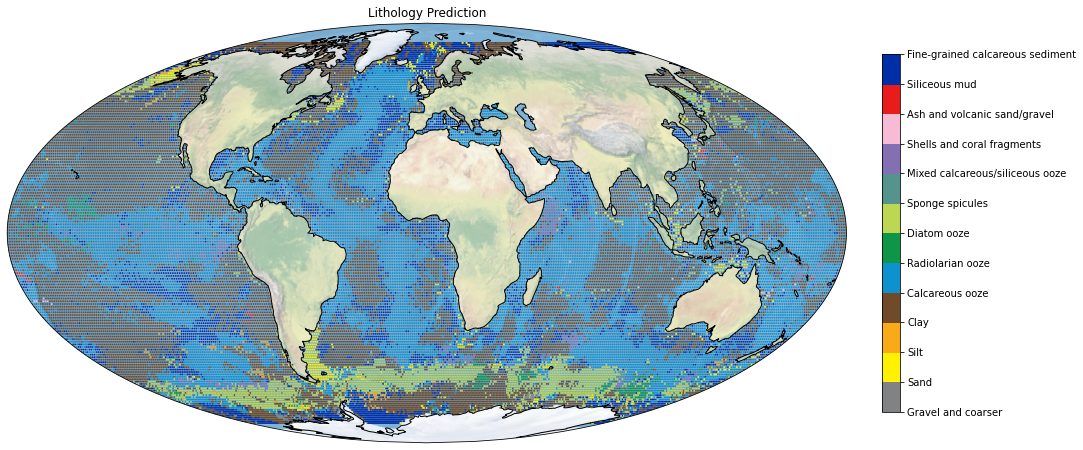

In [105]:
plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines()
ax.scatter(result['lon'], result['lat'], c=result['result_discrete'] + 1,
           cmap=cmap, s=0.5, norm=norm, transform=ccrs.PlateCarree())
sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []

# cb = pl.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cb = pl.colorbar(sm, ax=ax, 
#                  orientation="horizontal", 
                 ticks=list(lithology_mapping.keys()), 
                 fraction=0.02, pad=0.04)
cb.ax.set_yticklabels(list(lithology_mapping.values()))
# cb.ax.set_xlabel("Probability of Predicted Label")
ax.set_title("Lithology Prediction")
plt.savefig("Lithology_Prediction.png")
plt.show()

4     15375
5      9028
13     4272
12     2879
7      2614
2      1334
3       645
9       619
6       612
1       355
11      167
10       86
8        63
Name: lithology, dtype: int64


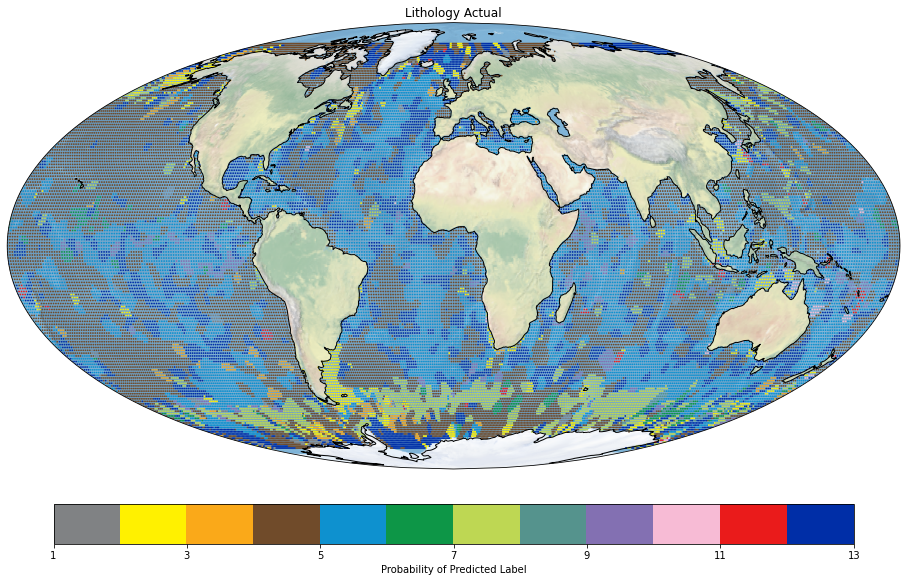

In [68]:
data = pd.read_csv("data/train_clean.csv")
print(data['lithology'].value_counts())
plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines()
ax.scatter(data['longitude'], data['latitude'], c=data['lithology'],
           cmap=cmap, s=0.5, norm=norm, transform=ccrs.PlateCarree())
sm = pl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.05)
cb = pl.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cb.ax.set_xlabel("Probability of Predicted Label")
ax.set_title("Lithology Actual")
plt.show()

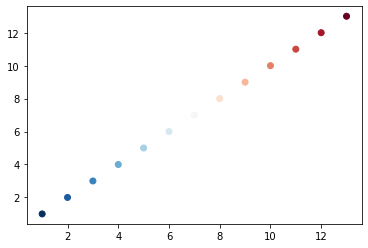

In [54]:
x = np.arange(1, 14)
pl.scatter(x, x, cmap='RdBu_r', c=x)

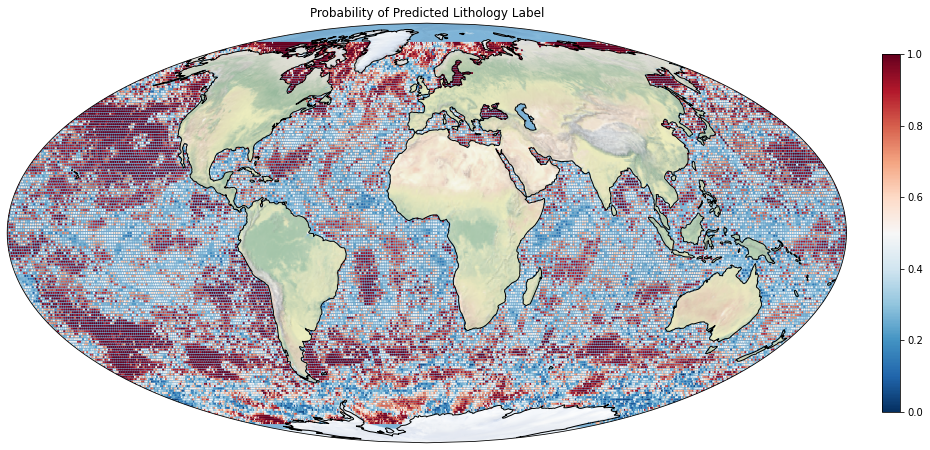

In [104]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

pl.figure(figsize=(16, 12))
ax = pl.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines()
ax.scatter(result['lon'], result['lat'], c=result['prob'],
           cmap='RdBu_r', s=1, transform=ccrs.PlateCarree())
# ax.colorbar()
sm = pl.cm.ScalarMappable(cmap='RdBu_r', norm=pl.Normalize(0,1))
sm._A = []
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.05)
cb = pl.colorbar(sm, ax=ax, 
#                  orientation="horizontal", 
                 fraction=0.02, pad=0.04)
# cb.ax.set_xlabel("Probability of Predicted Label")
ax.set_title("Probability of Predicted Lithology Label")
pl.savefig("Lithology_Prediction_Probability.png")
pl.show()

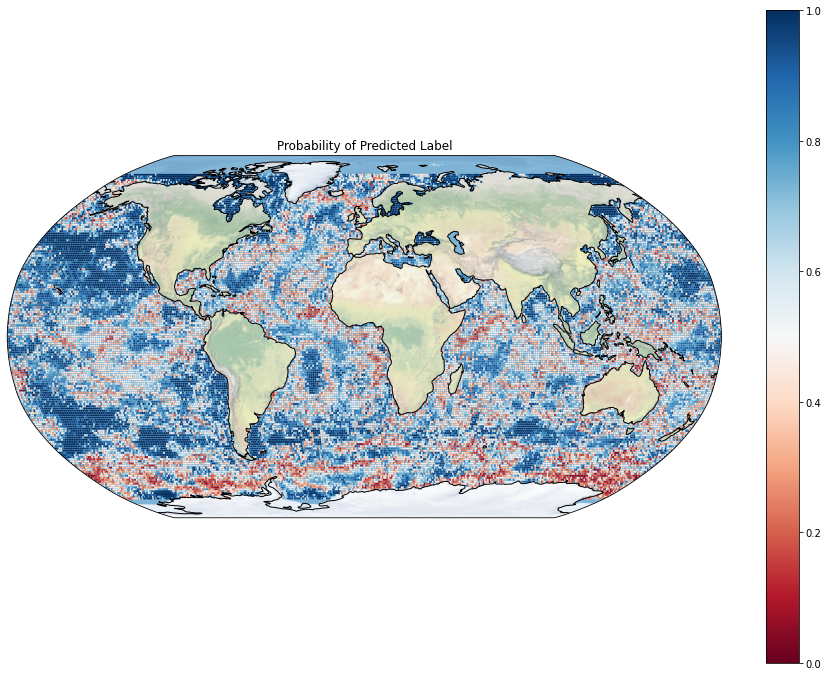

In [9]:
pl.figure(figsize=(16, 12))
ax = pl.axes(projection=ccrs.Robinson())
ax.stock_img()
ax.coastlines()
ax.scatter(result['lon'], result['lat'], c=result['prob'],
           cmap='RdBu', s=1, transform=ccrs.PlateCarree())
# ax.colorbar()
# cmap_reversed = matplotlib.cm.get_cmap('autumn_r')
sm = pl.cm.ScalarMappable(cmap='RdBu', norm=pl.Normalize(0,1))
sm._A = []
cb = pl.colorbar(sm, ax=ax)
ax.set_title("Probability of Predicted Label")
pl.show()